In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("covid19.csv")
data = data.fillna(0)
data = data.drop(["Source","Unofficial deaths daily"], axis = 1)
data_train = data[["Confirmed daily", "Recovered", "Official deaths daily"]]
data_train = data_train.iloc[-40:,:]

R_obs_w = list(data_train["Confirmed daily"]) + [440, 375, 396]
O_obs_w = list(data_train["Recovered"]) + [299, 122, 157]
Z_obs_w = list(data_train["Official deaths daily"]) + [15,10, 9] # łącznie z 14 czerwca
O_obs_w = O_obs_w[23:]
R_obs_w = R_obs_w[10:]
Z_obs_w= Z_obs_w[19:]
fig, axes = plt.subplots(3,1, sharex=True, figsize=(17, 10))
axes[0].plot(range(len(R_obs_w)), R_obs_w )
axes[1].plot(range(len(O_obs_w)), O_obs_w ,"g")
axes[2].plot(range(len(Z_obs_w)), Z_obs_w, "r" )
plt.show()

print("\n Mean values:\n",data_train.mean())
print("\n Mean values:\n",data_train.iloc[-10:,:].mean())

R_obs_w[-10:]

<Figure size 1700x1000 with 3 Axes>


 Mean values:
 Confirmed daily          358.225
Recovered                246.500
Official deaths daily     13.600
dtype: float64

 Mean values:
 Confirmed daily          418.2
Recovered                207.9
Official deaths daily     13.0
dtype: float64


[576.0, 575.0, 599.0, 400.0, 282.0, 359.0, 376.0, 440, 375, 396]

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt


model_holt_R = Holt(R_obs_w)
model_holt_R = model_holt_R.fit()
model_STE_R = SimpleExpSmoothing(R_obs_w)
model_STE_R.fit()

model_holt_Z = Holt(Z_obs_w)
model_holt_Z.fit()
model_STE_Z = SimpleExpSmoothing(Z_obs_w)
model_STE_Z.fit()

model_holt_O = Holt(O_obs_w)
model_holt_O.fit()
model_STE_O = SimpleExpSmoothing(O_obs_w)
model_STE_O.fit()

/home/jan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [8]:
# R forecast
koniec = 20
future = 30
R_forecast = model_holt_R.forecast(future - koniec)
R_forecast = pd.DataFrame(R_forecast,index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(R_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),R_forecast],axis=1).plot()

print(future_forecast)

NameError: name 'future_forecast' is not defined

      Prediction
21.0   22.061337
22.0    6.623004
23.0   16.126333
24.0    0.460673
25.0    9.942059
26.0    6.737451
27.0    7.009221
28.0   17.396564
29.0    2.791453
30.0    4.370554


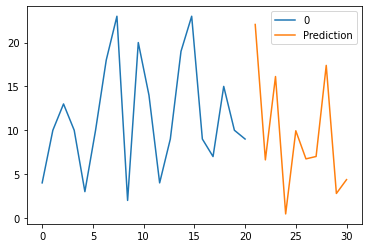

In [39]:
stepwise_model_Z.fit(Z_obs_w)
koniec = 20
future = 10
future_forecast = stepwise_model_Z.predict(n_periods=future)
future_forecast = pd.DataFrame(future_forecast,index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(Z_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),future_forecast],axis=1).plot()

print(future_forecast)

      Prediction
20.0  179.086832
21.0  196.900635
22.0  267.714439
23.0   92.528243
24.0  283.342046
25.0  107.155850
26.0  142.969653
27.0  165.870289
28.0  184.497896
29.0  256.125503
30.0   81.753111
31.0  273.380718
32.0   98.008325
33.0  134.635932
34.0  158.350371
35.0  177.791782
36.0  250.233193
37.0   76.674604
38.0  269.116015
39.0   94.557426
40.0  131.998837
41.0  156.527079
42.0  176.782294
43.0  250.037509
44.0   77.292723
45.0  270.547938
46.0   96.803152
47.0  135.058367
48.0  160.400413
49.0  181.469431


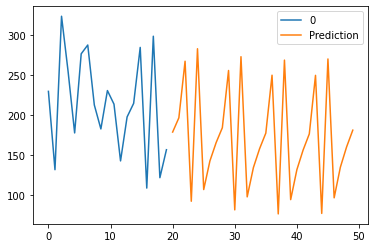

In [32]:
stepwise_model_O.fit(O_obs_w)
koniec = 19
future = 30
future_forecast = stepwise_model_O.predict(n_periods=future)
future_forecast = pd.DataFrame(future_forecast,index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(O_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),future_forecast],axis=1).plot()

print(future_forecast)